In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path = '../../parsers/official/data/club_stat.csv'
df = pd.read_csv(Path(path).resolve())
pd.set_option('display.max_columns', None)
df.head()

,season_id,name,club_name,club_shortName,club_abbr,club_id,teamType,shortName,id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
0,578,Arsenal,Arsenal,Arsenal,ARS,1.0,FIRST,Arsenal,1.0,4792.0,372.0,41.0,109.0,69.0,13.0,8.0,6358.0,85.0,9.0,113.0,59.0,116.0,429.0,11041.0,7.0,26.0,266.0,299.0,285.0,132.0,119.0,74.0,253.0,112.0,225.

In [3]:
df['club_id'].unique()

array([  1.,   2., 127., 130., 131.,  43.,  46.,   4.,   6.,   7.,  34.,
       159.,  41.,   9.,  26.,  10., 163.,  11.,  12.,  13.,  23.,  14.,
        15.,  17.,  18.,  20.,  42.,  29.,  45.,  21.,  33.,  36.,  25.,
        38.])

In [36]:


def helthy_service(uri: str):
    try:
        r= requests.get(f'http://{uri}')
        if r.status_code == 200:
            streamlit_status = 'healthy'
        else:
            streamlit_status = 'unhealthy'
    except Exception as e:
        streamlit_status = 'unhealthy'
    return streamlit_status

def helthy_services(services: dict = uri):
    result = {}
    for name, uri in services.items():
        result[name] = helthy_service(uri)
    return result
helthy_services()

{'streamlit': 'unhealthy',
 'api': 'unhealthy',
 'mlflow': 'unhealthy',
 'minio': 'unhealthy',
 'airflow': 'healthy'}

In [5]:
#Удаляем колонки в которых информация дублируется либо информация бесполезна
df.drop(['name',
         'club_shortName',
         'shortName', 
         'id', 
         'teamType'], axis=1, inplace=True)

In [6]:
df.describe()

,season_id,club_id,_accurate_back_zone_pass,_accurate_chipped_pass,_accurate_corners_intobox,_accurate_cross,_accurate_cross_nocorner,_accurate_flick_on,_accurate_freekick_cross,_accurate_fwd_zone_pass,_accurate_goal_kicks,_accurate_keeper_sweeper,_accurate_keeper_throws,_accurate_launches,_accurate_layoffs,_accurate_long_balls,_accurate_pass,_accurate_pull_back,_accurate_through_ball,_accurate_throws,_aerial_lost,_aerial_won,_attempted_tackle_foul,_attempts_conceded_ibox,_attempts_conceded_obox,_attempts_ibox,_attempts_obox,_att_assist_openplay,_att_assist_setplay,_att_bx_centre,_att_bx_left,_att_bx_right,_att_cmiss_high,_att_cmiss_left,_att_cmiss_right,_att_corner,_att_fastbreak,_att_goal_high_centre,_att_goal_high_left,_att_goal_high_right,_att_goal_low_centre,_att_goal_low_left,_att_goal_low_right,_att_hd_goal,_att_hd_miss,_att_hd_post,_att_hd_target,_att_hd_total,_att_ibox_blocked,_att_ibox_goal,_att_ibox_miss,_att_ibox_post,_att_ibox_target,_att_lf_goal,_att_lf_target,_att_lf_total,_att_miss_high,_att_miss_high_left,_att_miss_high_right,_att_miss_left,_att_miss_right,_att_obox_blocked,_att_obox_goal,_att_obox_miss,_att_obox_target,_att_obx_centre,_att_one_on_one,_att_openplay,_att_pen_goal,_att_post_left,_att_rf_goal,_att_rf_target,_att_rf_total,_att_setpiece,_att_sv_high_centre,_att_sv_high_left,_att_sv_high_right,_att_sv_low_centre,_att_sv_low_left,_att_sv_low_right,_backward_pass,_ball_recovery,_big_chance_created,_big_chance_missed,_big_chance_scored,_blocked_cross,_blocked_pass,_blocked_scoring_att,_challenge_lost,_clean_sheet,_clearance_off_line,_contentious_decision,_corner_taken,_crosses_18yard,_crosses_18yardplus,_defender_goals,_dispossessed,_diving_save,_draws,_duel_lost,_duel_won,_effective_blocked_cross,_effective_clearance,_effective_head_clearance,_error_lead_to_goal,_error_lead_to_shot,_final_third_entries,_first_half_goals,_fk_foul_lost,_fk_foul_won,_forward_goals,_fouled_final_third,_freekick_cross,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_conceded_obox,_goals_openplay,_goal_assist,_goal_assist_deadball,_goal_assist_intentional,_goal_assist_openplay,_goal_assist_setplay,_goal_fastbreak,_goal_kicks,_good_high_claim,_hand_ball,_head_clearance,_hit_woodwork,_interception,_interceptions_in_box,_interception_won,_keeper_throws,_last_man_tackle,_leftside_pass,_long_pass_own_to_opp,_long_pass_own_to_opp_success,_lost_corners,_midfielder_goals,_offtarget_att_assist,_ontarget_att_assist,_ontarget_scoring_att,_open_play_pass,_outfielder_block,_overrun,_own_goal_accrued,_passes_left,_passes_right,_penalty_conceded,_penalty_faced,_penalty_won,_pen_area_entries,_pen_goals_conceded,_possession_percentage,_poss_lost_all,_poss_lost_ctrl,_poss_won_att_3rd,_poss_won_def_3rd,_poss_won_mid_3rd,_post_scoring_att,_pts_dropped_winning_pos,_pts_gained_losing_pos,_punches,_put_through,_rightside_pass,_saved_ibox,_saved_obox,_saves,_second_yellow,_shield_ball_oop,_shot_fastbreak,_shot_off_target,_six_yard_block,_subs_goals,_subs_made,_successful_final_third_passes,_successful_open_play_pass,_successful_put_through,_total_att_assist,_total_back_zone_pass,_total_chipped_pass,_total_clearance,_total_contest,_total_corners_intobox,_total_cross,_total_cross_nocorner,_total_fastbreak,_total_final_third_passes,_total_flick_on,_total_fwd_zone_pass,_total_high_claim,_total_keeper_sweeper,_total_launches,_total_layoffs,_total_long_balls,_total_offside,_total_pass,_total_pull_back,_total_red_card,_total_scoring_att,_total_tackle,_total_through_ball,_total_throws,_total_yel_card,_touches,_touches_in_opp_box,_unsuccessful_touch,_wins,_won_contest,_won_corners,_won_tackle,_attendance_count,_attendance_total,_attendance_average,_attendance_highest,_attendance_lowest
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,199.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000

In [7]:
df.shape

(200, 219)

In [8]:
id_season = {
        578: 2023,
        489: 2022,
        418: 2021,
        363: 2020,
        274: 2019,
        210: 2018,
        79: 2017,
        54: 2016,
        42: 2015,
        27: 2014,
        22: 2013,
        21: 2012,
        20: 2011,
        19: 2010,
        18: 2009,
        17: 2008,
        16: 2007,
        15: 2006,
        14: 2005,
        13: 2004,
        12: 2003,
        11: 2002,
        10: 2001,
        9: 2000,
        8: 1999,
        7: 1998,
        6: 1997,
        5: 1996,
        4: 1995,
        3: 1994,
        2: 1993,
        1: 1992}

In [9]:
df['season'] = df['season_id'].apply(lambda x: id_season[x])

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 220 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    season_id                       200 non-null    int64  
 1    club_name                       200 non-null    object 
 2    club_abbr                       200 non-null    object 
 3    club_id                         200 non-null    float64
 4    _accurate_back_zone_pass        200 non-null    float64
 5    _accurate_chipped_pass          200 non-null    float64
 6    _accurate_corners_intobox       200 non-null    float64
 7    _accurate_cross                 200 non-null    float64
 8    _accurate_cross_nocorner        200 non-null    float64
 9    _accurate_flick_on              200 non-null    float64
 10   _accurate_freekick_cross        200 non-null    float64
 11   _accurate_fwd_zone_pass         200 non-null    float64
 12   _accurate_goal_kicks

In [11]:
df['club_name'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Queens Park Rangers', 'Sheffield United',
       'Southampton', 'Stoke City', 'Sunderland', 'Swansea City',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [12]:
columns = list(df.columns)

In [13]:
columns

['season_id',
 'club_name',
 'club_abbr',
 'club_id',
 '_accurate_back_zone_pass',
 '_accurate_chipped_pass',
 '_accurate_corners_intobox',
 '_accurate_cross',
 '_accurate_cross_nocorner',
 '_accurate_flick_on',
 '_accurate_freekick_cross',
 '_accurate_fwd_zone_pass',
 '_accurate_goal_kicks',
 '_accurate_keeper_sweeper',
 '_accurate_keeper_throws',
 '_accurate_launches',
 '_accurate_layoffs',
 '_accurate_long_balls',
 '_accurate_pass',
 '_accurate_pull_back',
 '_accurate_through_ball',
 '_accurate_throws',
 '_aerial_lost',
 '_aerial_won',
 '_attempted_tackle_foul',
 '_attempts_conceded_ibox',
 '_attempts_conceded_obox',
 '_attempts_ibox',
 '_attempts_obox',
 '_att_assist_openplay',
 '_att_assist_setplay',
 '_att_bx_centre',
 '_att_bx_left',
 '_att_bx_right',
 '_att_cmiss_high',
 '_att_cmiss_left',
 '_att_cmiss_right',
 '_att_corner',
 '_att_fastbreak',
 '_att_goal_high_centre',
 '_att_goal_high_left',
 '_att_goal_high_right',
 '_att_goal_low_centre',
 '_att_goal_low_left',
 '_att_goal_

In [14]:
col_eda = [
        'season',
        'club_name',
        '_accurate_pass',
        '_accurate_goal_kicks',
        '_accurate_cross',
        '_aerial_lost',
        '_aerial_won',
        '_total_long_balls',
        '_total_offside',
        '_total_pass',
        '_total_cross',
        '_duel_lost',
        '_duel_won',
        '_saves',
        '_wins',
        '_draws',
        '_won_contest',
        '_won_corners',
        '_won_tackle',
        '_total_yel_card',
        '_keeper_throws',
        '_fwd_pass',
        '_goals',
        '_goals_conceded',
        '_goals_conceded_ibox',
        '_goals_openplay',
        '_goal_assist',
        '_goal_assist_intentional',
        '_goal_assist_openplay',
        '_goal_kicks',
        '_good_high_claim',
        '_blocked_cross',
        '_blocked_pass',
]

In [15]:
df_new = df[col_eda]

<AxesSubplot:>

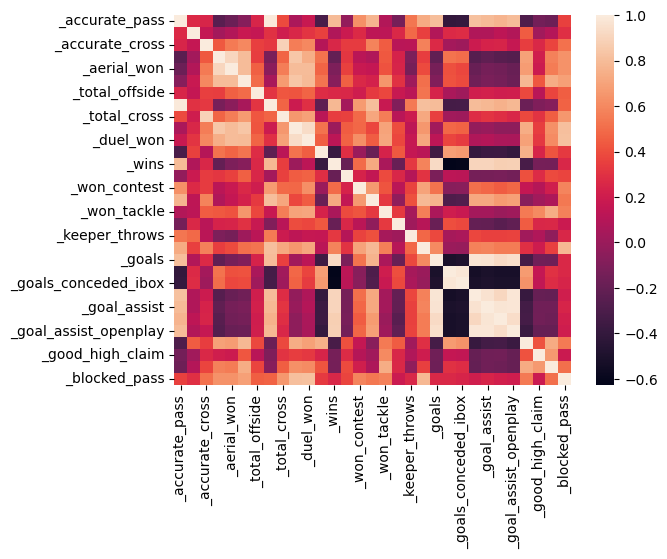

In [16]:
sns.heatmap(df_new.iloc[:, 2:].corr())

Больше всего нам интересны победы и голы, пусть они будут нашими целевыми признаками. Рассмотрим корреляцию других признаков к целевым

In [17]:
df_new.iloc[:, 2:].corr()[['_wins', '_goals']]

,_wins,_goals
_accurate_pass,0.792254,0.807638
_accurate_goal_kicks,0.084612,0.088681
_accurate_cross,0.256045,0.267631
_aerial_lost,-0.206872,-0.216580
_aerial_won,-0.109117,-0.132340
_total_long_balls,-0.068669,-0.093519
_total_offside,0.259540,0.234389
_total_pass,0.782437,0.798922
_total_cross,0.342559,0.346199
_duel_lost,0.008987,0.022731


Теперь возьмем полный датасет и посмотрим какие признаки наиболее зависимы и наименее, фильтровать будем по голам

In [18]:
#Значения нам нужны по модулю
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', key= lambda x: abs(x))[:20]

,_wins,_goals
_fk_foul_lost,-0.001152,-0.002714
_last_man_tackle,0.015286,0.006980
_attempted_tackle_foul,-0.007418,0.015790
_duel_lost,0.008987,0.022731
_crosses_18yardplus,0.069647,0.027313
_interception,-0.023239,-0.035269
_interception_won,-0.023270,-0.035314
_poss_won_def_3rd,0.027358,0.038547
_shield_ball_oop,0.038607,0.040270
_error_lead_to_goal,-0.147291,-0.052169


In [19]:
df.iloc[:, 4:].corr()[['_wins', '_goals']].sort_values(by='_goals', ascending=False, key= lambda x: abs(x))[:20]


,_wins,_goals
_goals,0.926849,1.000000
_att_ibox_goal,0.923280,0.986802
_goals_openplay,0.904237,0.969874
_goal_assist,0.898720,0.965588
_goal_assist_openplay,0.881156,0.947206
_big_chance_scored,0.859591,0.933636
_goal_assist_intentional,0.876527,0.928309
_wins,1.000000,0.926849
_first_half_goals,0.868568,0.926107
_ontarget_scoring_att,0.859889,0.911535


Сгруппируем датасет по командам, берем среднее значение т.к. не все команды играли все сезоны

In [20]:
df_group = df_new.iloc[:, 1:].groupby(by='club_name', as_index=False).mean()

In [21]:
df_group.head()

,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,Arsenal,16663.400000,147.400000,146.200000,569.500000,545.400000,1796.700000,72.700000,19766.700000,668.800000,1853.500000,1891.300000,104.500000,19.900000,7.300000,377.400000,219.100000,378.200000,58.100000,190.700000,6370.100000,66.400000,41.700000,37.100000,46.900000,47.700000,37.900000,38.800000,244.500000,31.500000,61.400000,569.600000
1,Aston Villa,11710.285714,167.000000,154.142857,575.571429,586.285714,2110.428571,53.714286,14707.857143,685.000000,1848.142857,1924.285714,108.428571,11.857143,7.000000,324.285714,179.714286,360.000000,71.142857,157.142857,5248.285714,43.714286,53.714286,46.000000,28.857143,31.714286,24.285714,25.000000,273.428571,45.285714,81.571429,491.428571
2,Bournemouth,11536.857143,163.428571,138.000000,638.571429,597.142857,2059.428571,52.142857,14738.285714,601.000000,1955.428571,1856.142857,110.428571,10.571429,7.571429,334.714286,183.571429,355.571429,57.428571,183.714286,5535.857143,43.857143,63.000000,55.714286,27.714286,30.285714,23.571429,22.571429,297.000000,29.857143,86.000000,568.857143
3,Brentford,9446.333333,160.000000,145.333333,572.000000,580.666667,1961.333333,58.000000,12554.666667,562.666667,1628.666667,1659.000000,112.666667,11.333333,8.333333,224.000000,141.333333,304.333333,54.000000,140.000000,4993.666667,45.666667,46.000000,37.333333,26.333333,29.000000,23.666667,21.333333,246.000000,34.333333,51.333333,370.333333
4,Brighton and Hove Albion,13989.142857,173.142857,156.714286,553.857143,596.285714,2100.285714,69.000000,17156.857143,638.714286,1810.285714,1816.285714,98.000000,10.714286,11.571429,299.285714,181.428571,349.714286,57.857143,158.428571,5802.000000,43.428571,49.857143,43.428571,29.142857,29.571429,22.571429,23.857143,265.142857,26.285714,59.571429,532.428571


In [22]:
#Посмотрим на самые успешные команды за последние 10 лет по наибольшему количеству голов
df_group[['club_name', '_goals', '_wins']].sort_values(by='_goals', ascending=False)[:10]

,club_name,_goals,_wins
17,Manchester City,86.400000,25.400000
15,Liverpool,73.900000,22.100000
29,Tottenham Hotspur,67.100000,19.700000
0,Arsenal,66.400000,19.900000
7,Chelsea,61.900000,19.000000
18,Manchester United,58.000000,19.000000
14,Leicester City,57.444444,14.888889
13,Leeds United,50.666667,11.333333
32,West Ham United,50.500000,13.100000
9,Everton,46.200000,12.500000


<AxesSubplot:xlabel='_goals', ylabel='Count'>

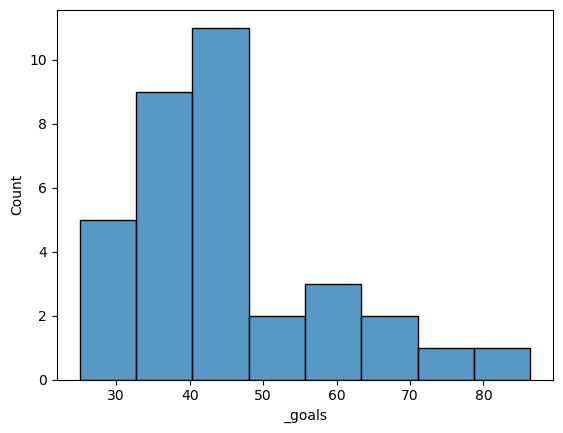

In [23]:
sns.histplot(df_group['_goals'])

<AxesSubplot:xlabel='_wins', ylabel='Count'>

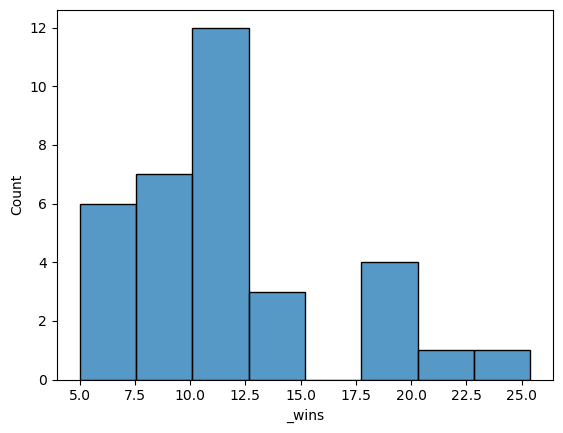

In [24]:
sns.histplot(df_group['_wins'])

<AxesSubplot:xlabel='_draws', ylabel='Count'>

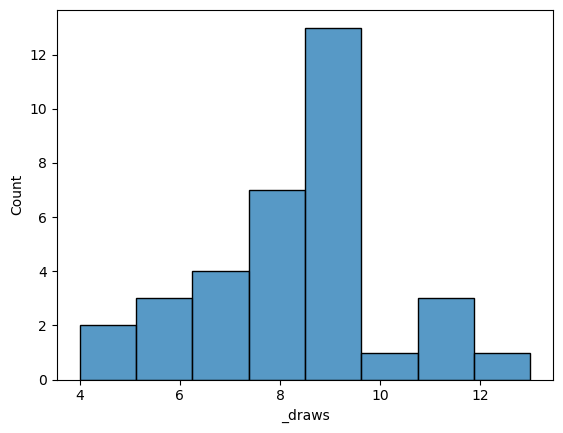

In [25]:
sns.histplot(df_group['_draws'])

In [26]:
df_new.shape

(200, 33)

In [27]:
df_new

,season,club_name,_accurate_pass,_accurate_goal_kicks,_accurate_cross,_aerial_lost,_aerial_won,_total_long_balls,_total_offside,_total_pass,_total_cross,_duel_lost,_duel_won,_saves,_wins,_draws,_won_contest,_won_corners,_won_tackle,_total_yel_card,_keeper_throws,_fwd_pass,_goals,_goals_conceded,_goals_conceded_ibox,_goals_openplay,_goal_assist,_goal_assist_intentional,_goal_assist_openplay,_goal_kicks,_good_high_claim,_blocked_cross,_blocked_pass
0,2023,Arsenal,11041.0,85.0,109.0,299.0,285.0,906.0,48.0,12655.0,437.0,1047.0,1042.0,36.0,14.0,4.0,164.0,175.0,201.0,31.0,114.0,3824.0,44.0,21.0,19.0,23.0,30.0,25.0,21.0,110.0,24.0,12.0,182.0
1,2022,Arsenal,17458.0,113.0,138.0,564.0,490.0,1721.0,56.0,20450.0,674.0,1840.0,1846.0,95.0,26.0,6.0,357.0,223.0,343.0,52.0,174.0,6354.0,88.0,43.0,36.0,66.0,64.0,49.0,55.0,185.0,17.0,46.0,301.0
2,2021,Arsenal,15254.0,132.0,149.0,577.0,470.0,1865.0,66.0,18290.0,633.0,1778.0,1678.0,100.0,22.0,3.0,319.0,209.0,311.0,60.0,175.0,5836.0,61.0,48.0,42.0,39.0,42.0,29.0,31.0,251.0,29.0,39.0,561.0
3,2020,Arsenal,17118.0,142.0,161.0,604.0,515.0,1850.0,61.0,20126.0,751.0,1763.0,1656.0,96.0,18.0,7.0,296.0,208.0,252.0,47.0,206.0,6007.0,55.0,39.0,35.0,42.0,39.0,31.0,35.0,238.0,23.0,42.0,566.0
4,2019,Arsenal,15582.0,221.0,141.0,599.0,513.0,1983.0,73.0,18649.0,699.0,2016.0,1934.0,147.0,14.0,14.0,411.0,232.0,336.0,86.0,233.0,5822.0,56.0,48.0,44.0,41.0,35.0,28.0,29.0,314.0,25.0,69.0,577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2022,Wolverhampton Wanderers,13590.0,161.0,156.0,543.0,468.0,2152.0,62.0,16712.0,661.0,1941.0,1890.0,119.0,11.0,8.0,375.0,186.0,370.0,84.0,196.0,5549.0,31.0,58.0,51.0,19.0,12.0,10.0,9.0,283.0,43.0,46.0,432.0
196,2021,Wolverhampton Wanderers,14236.0,200.0,137.0,494.0,465.0,2245.0,61.0,17517.0,587.0,1906.0,1919.0,125.0,15.0,6.0,450.0,168.0,377.0,59.0,220.0,5795.0,38.0,43.0,37.0,24.0,22.0,19.0,16.0,275.0,42.0,69.0,630.0
197,2020,Wolverhampton Wanderers,14570.0,196.0,171.0,608.0,581.0,2186.0,38.0,17522.0,775.0,1959.0,2015.0,103.0,12.0,9.0,468.0,209.0,335.0,53.0,156.0,5594.0,36.0,52.0,49.0,21.0,21.0,16.0,13.0,275.0,22.0,57.0,578.0
198,2019,Wolverhampton Wanderers,13286.0,171.0,177.0,719.0,788.0,2562.0,49.0,16764.0,718.0,2140.0,2289.0,91.0,15.0,14.0,509.0,193.0,367.0,57.0,127.0,5956.0,52.0,40.0,37.0,34.0,36.0,30.0,26.0,283.0,19.0,55.0,592.0


Рассмотрим совместное распределение признаков между собой 

In [28]:
df_new.iloc[:,5:8]

,_aerial_lost,_aerial_won,_total_long_balls
0,299.0,285.0,906.0
1,564.0,490.0,1721.0
2,577.0,470.0,1865.0
3,604.0,515.0,1850.0
4,599.0,513.0,1983.0
...,...,...,...
195,543.0,468.0,2152.0
196,494.0,465.0,2245.0
197,608.0,581.0,2186.0
198,719.0,788.0,2562.0


In [29]:
sns.__version__

'0.13.1'

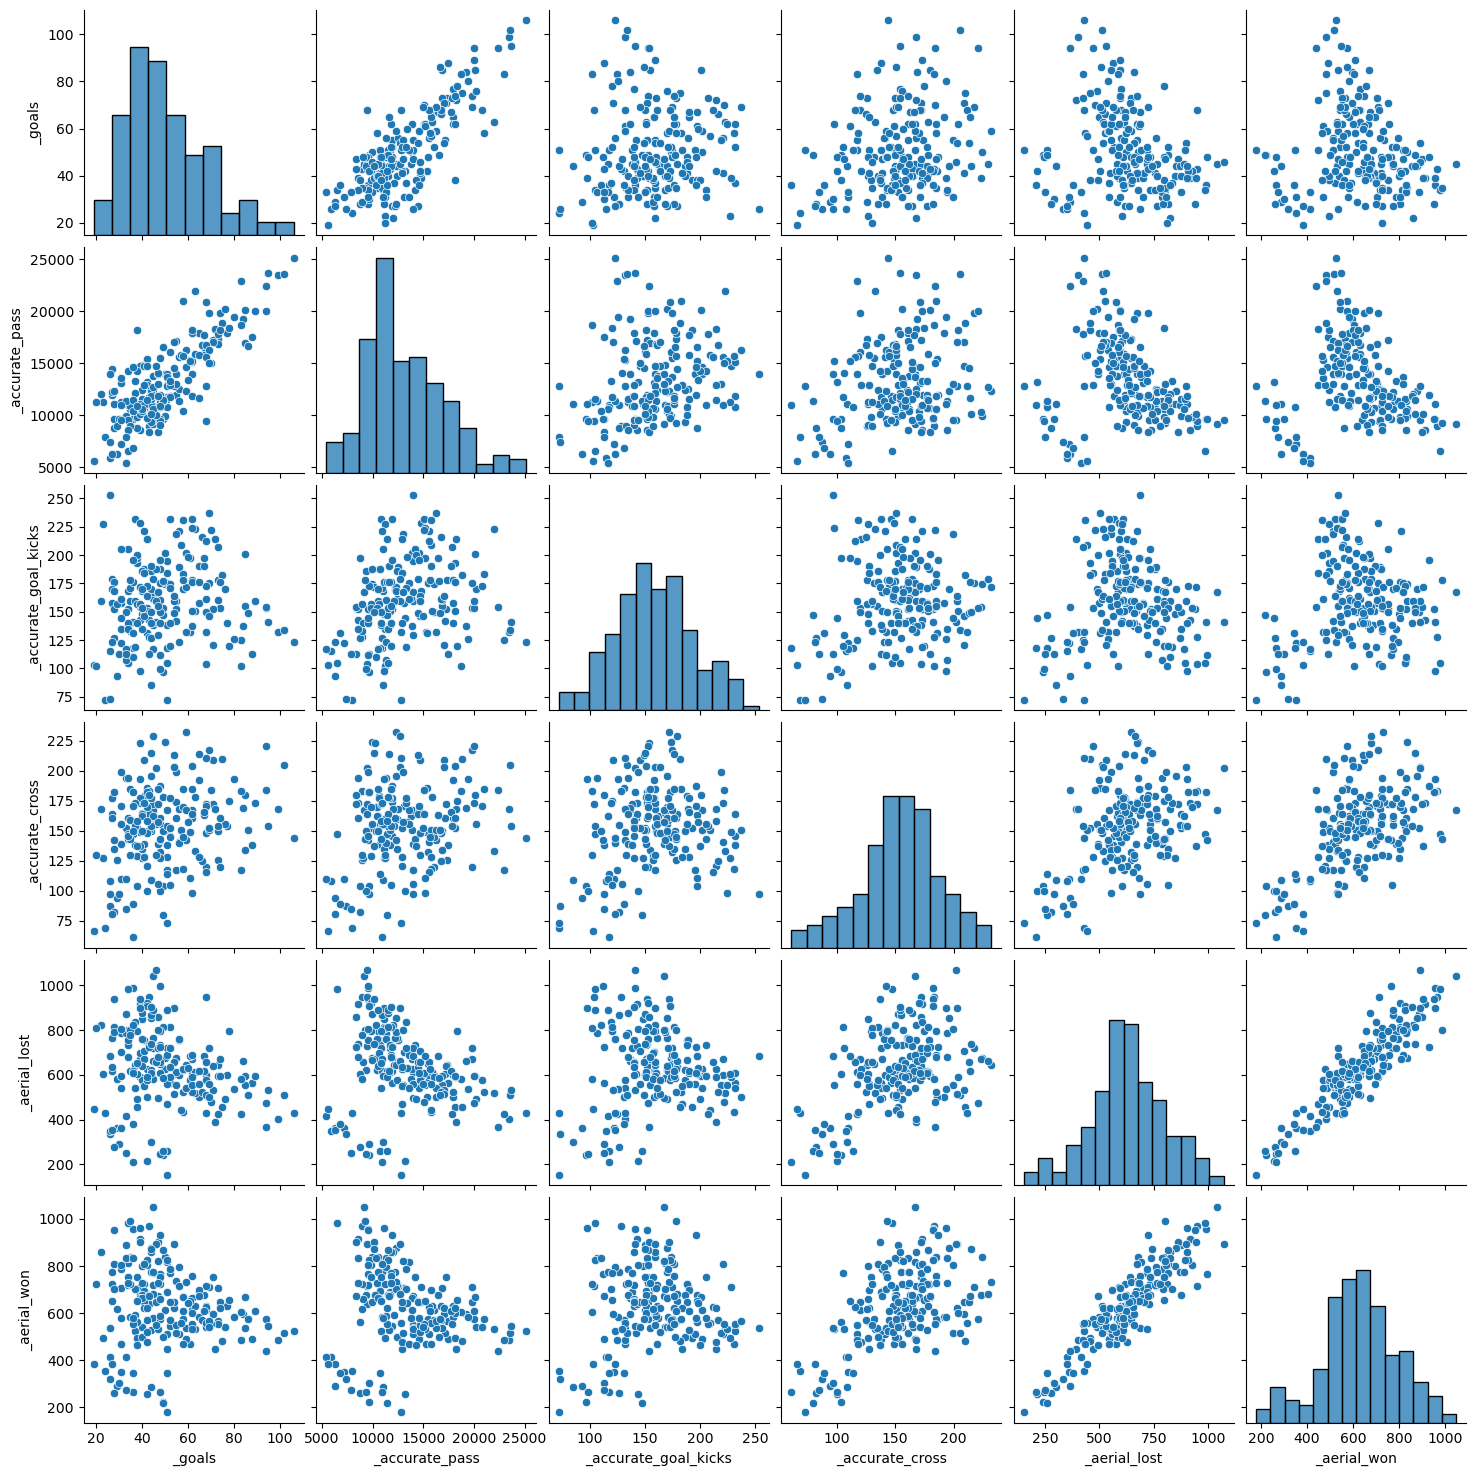

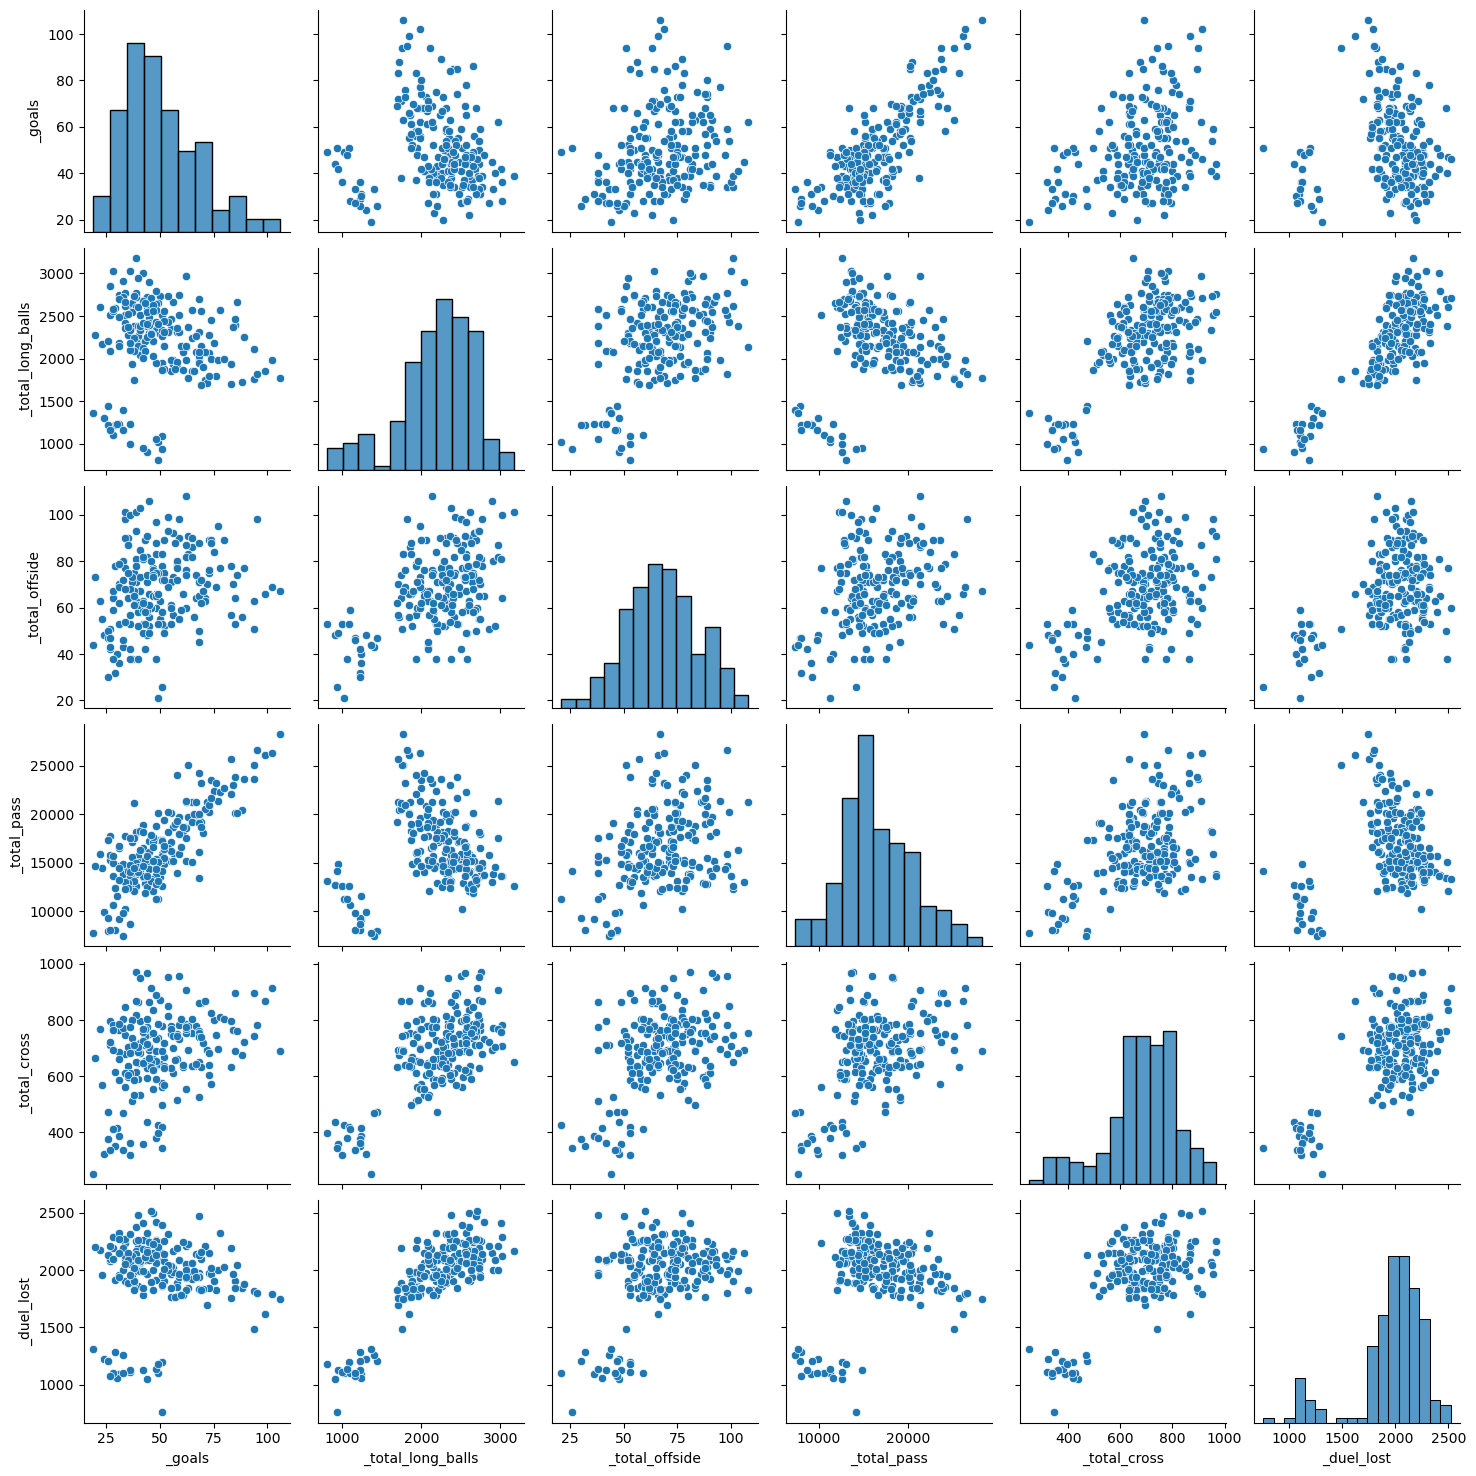

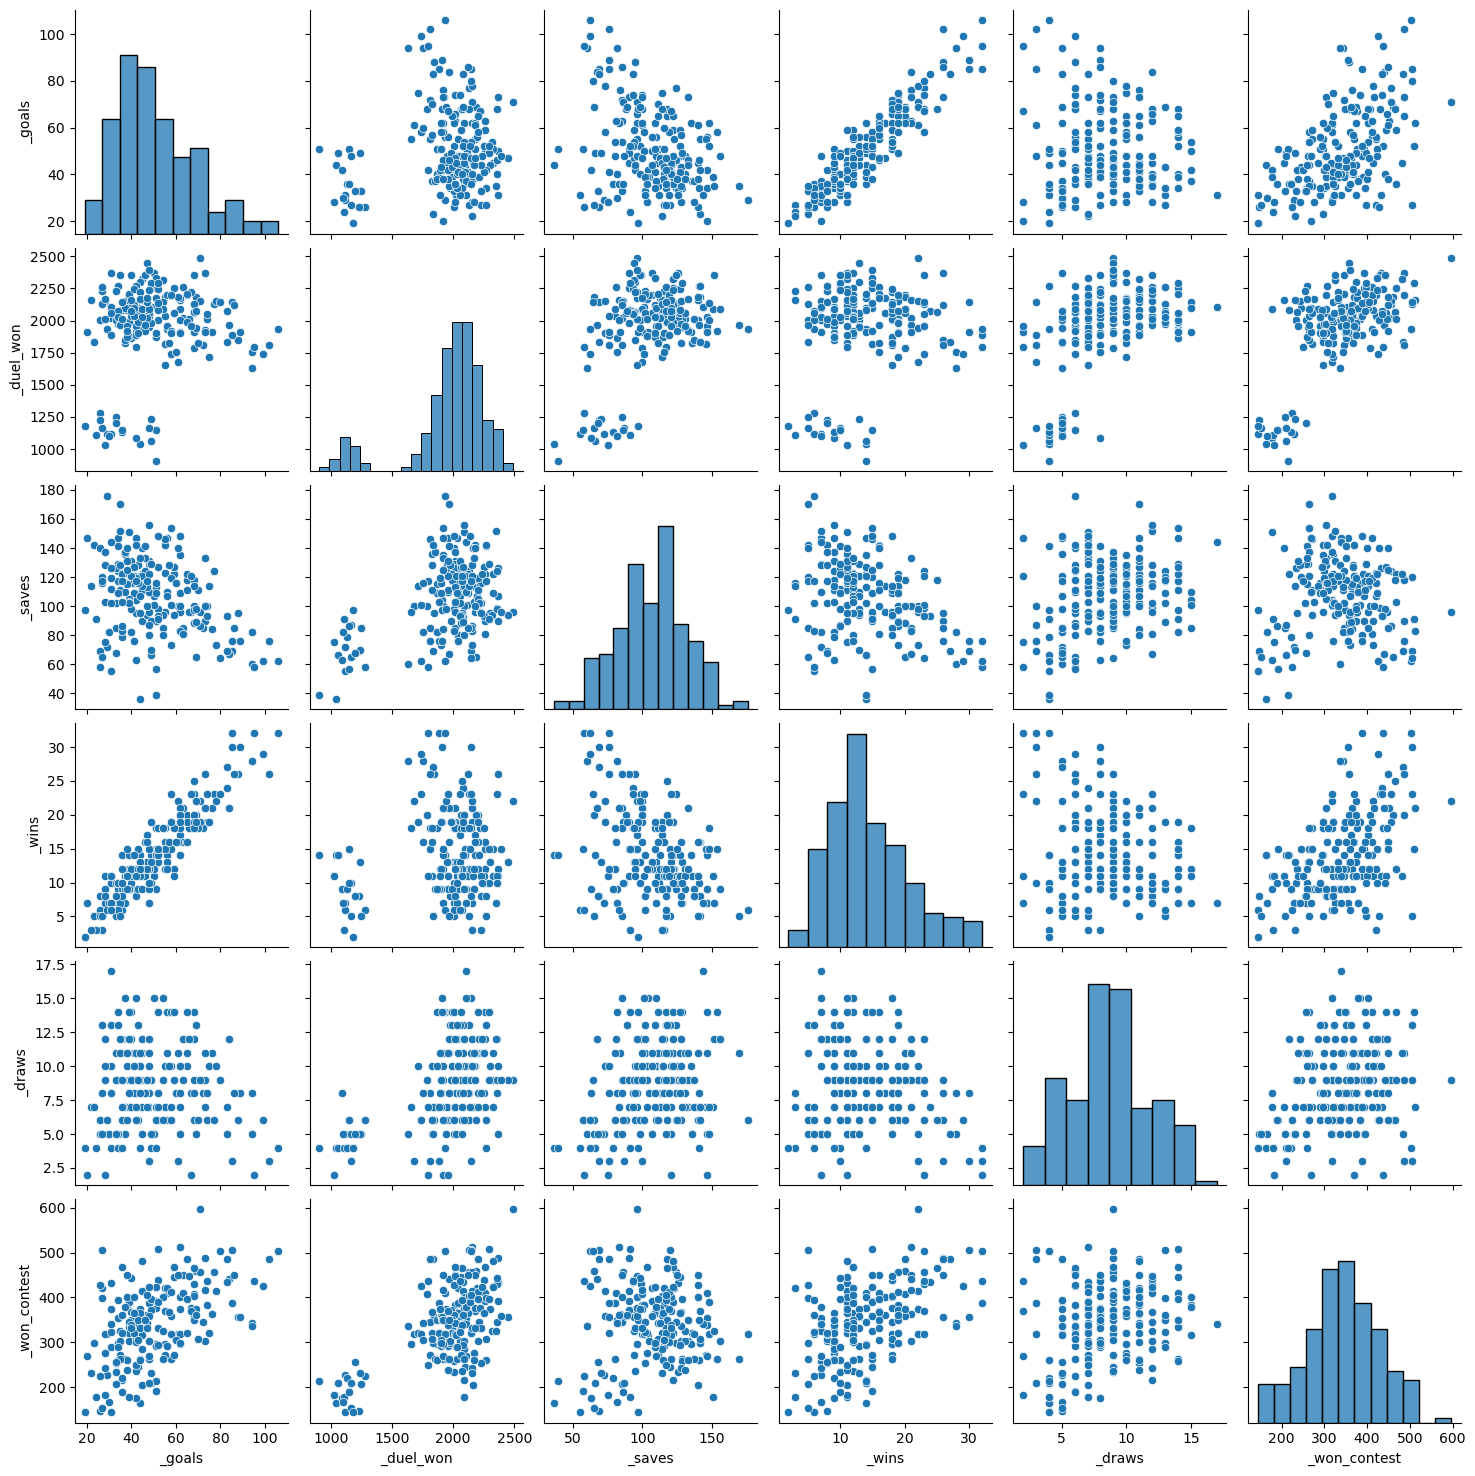

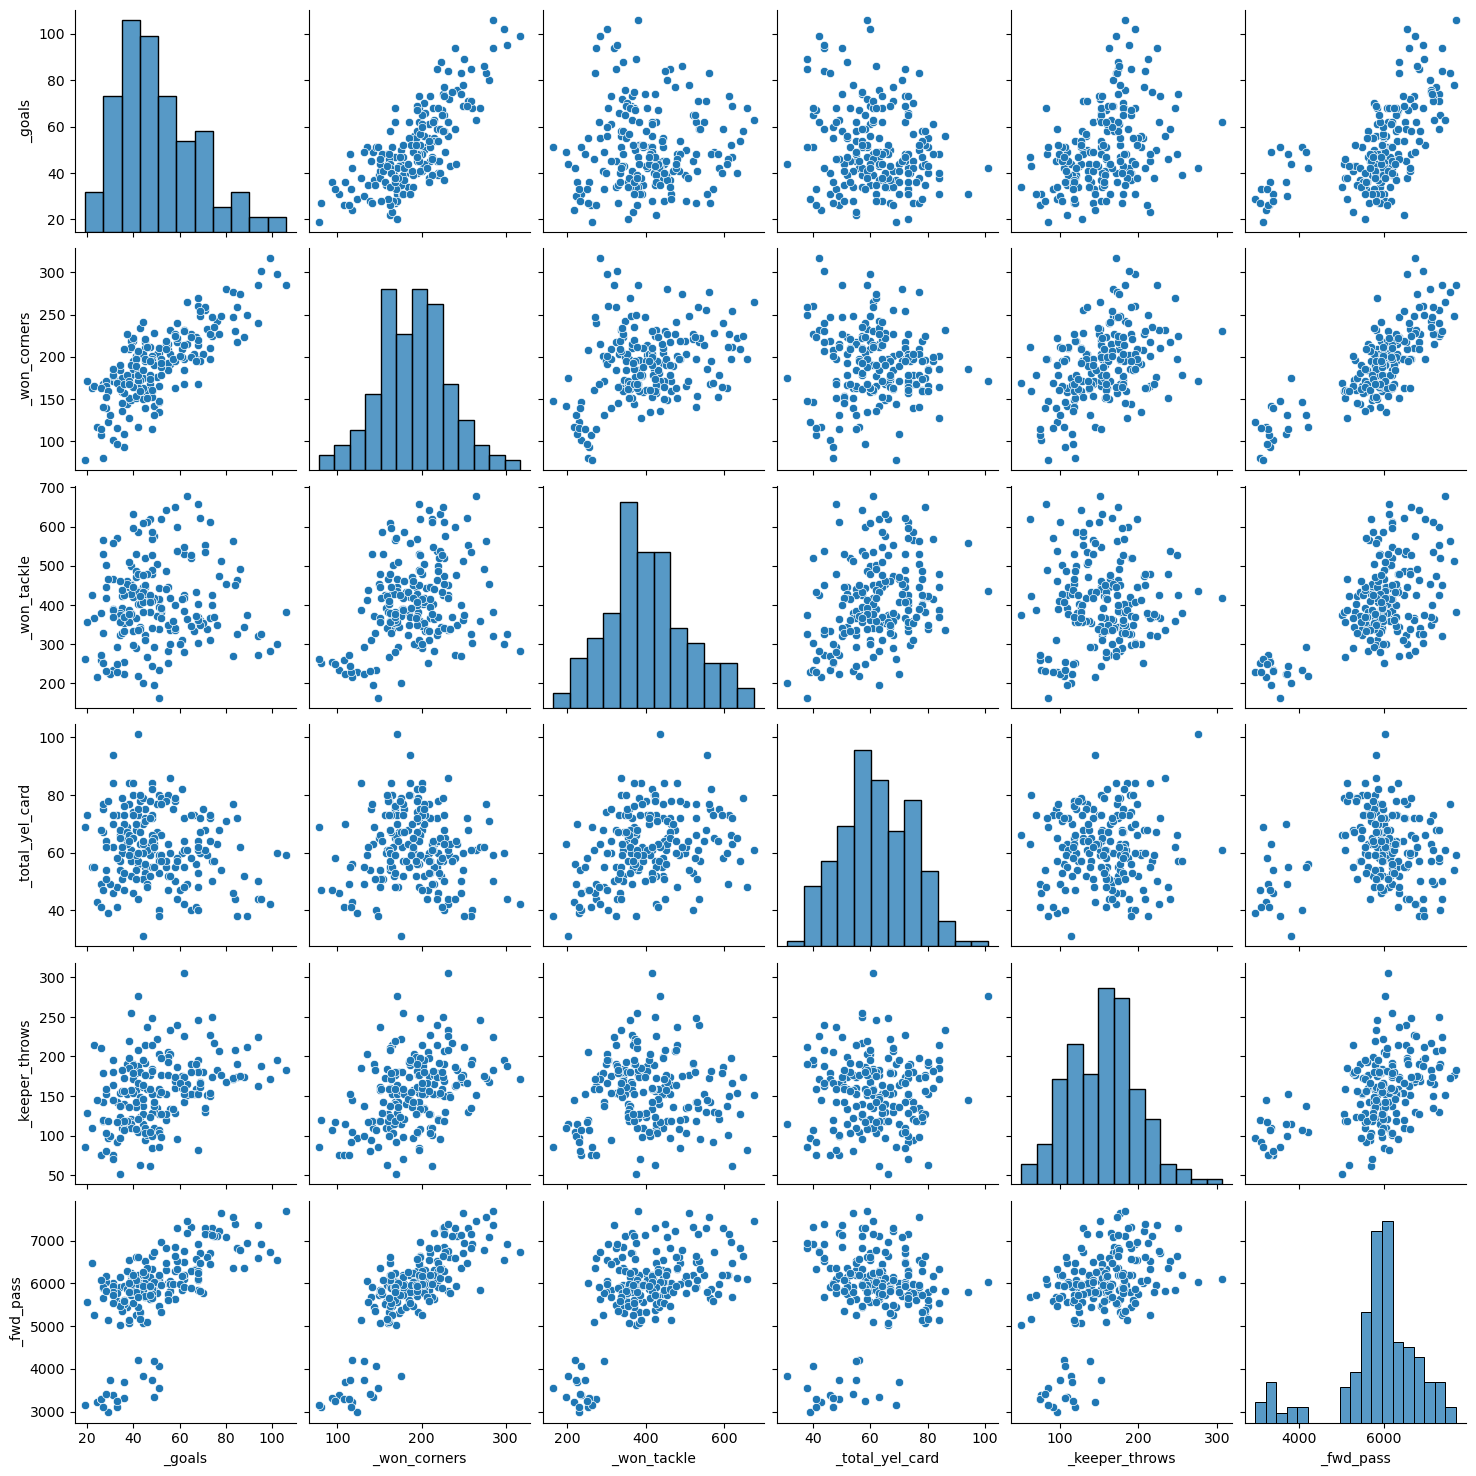

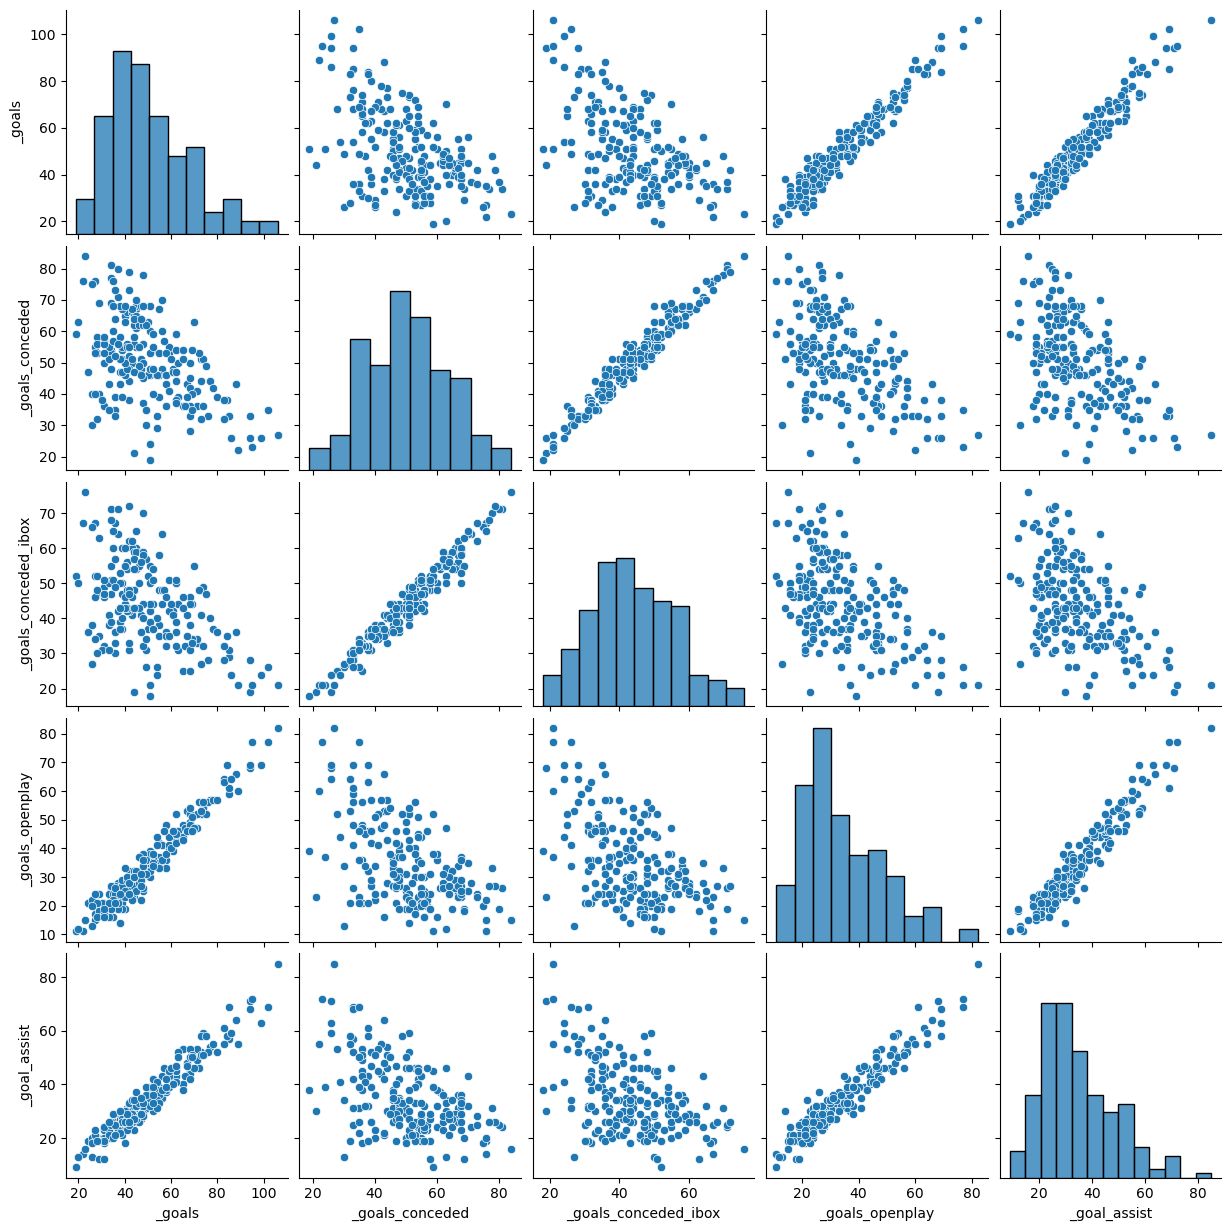

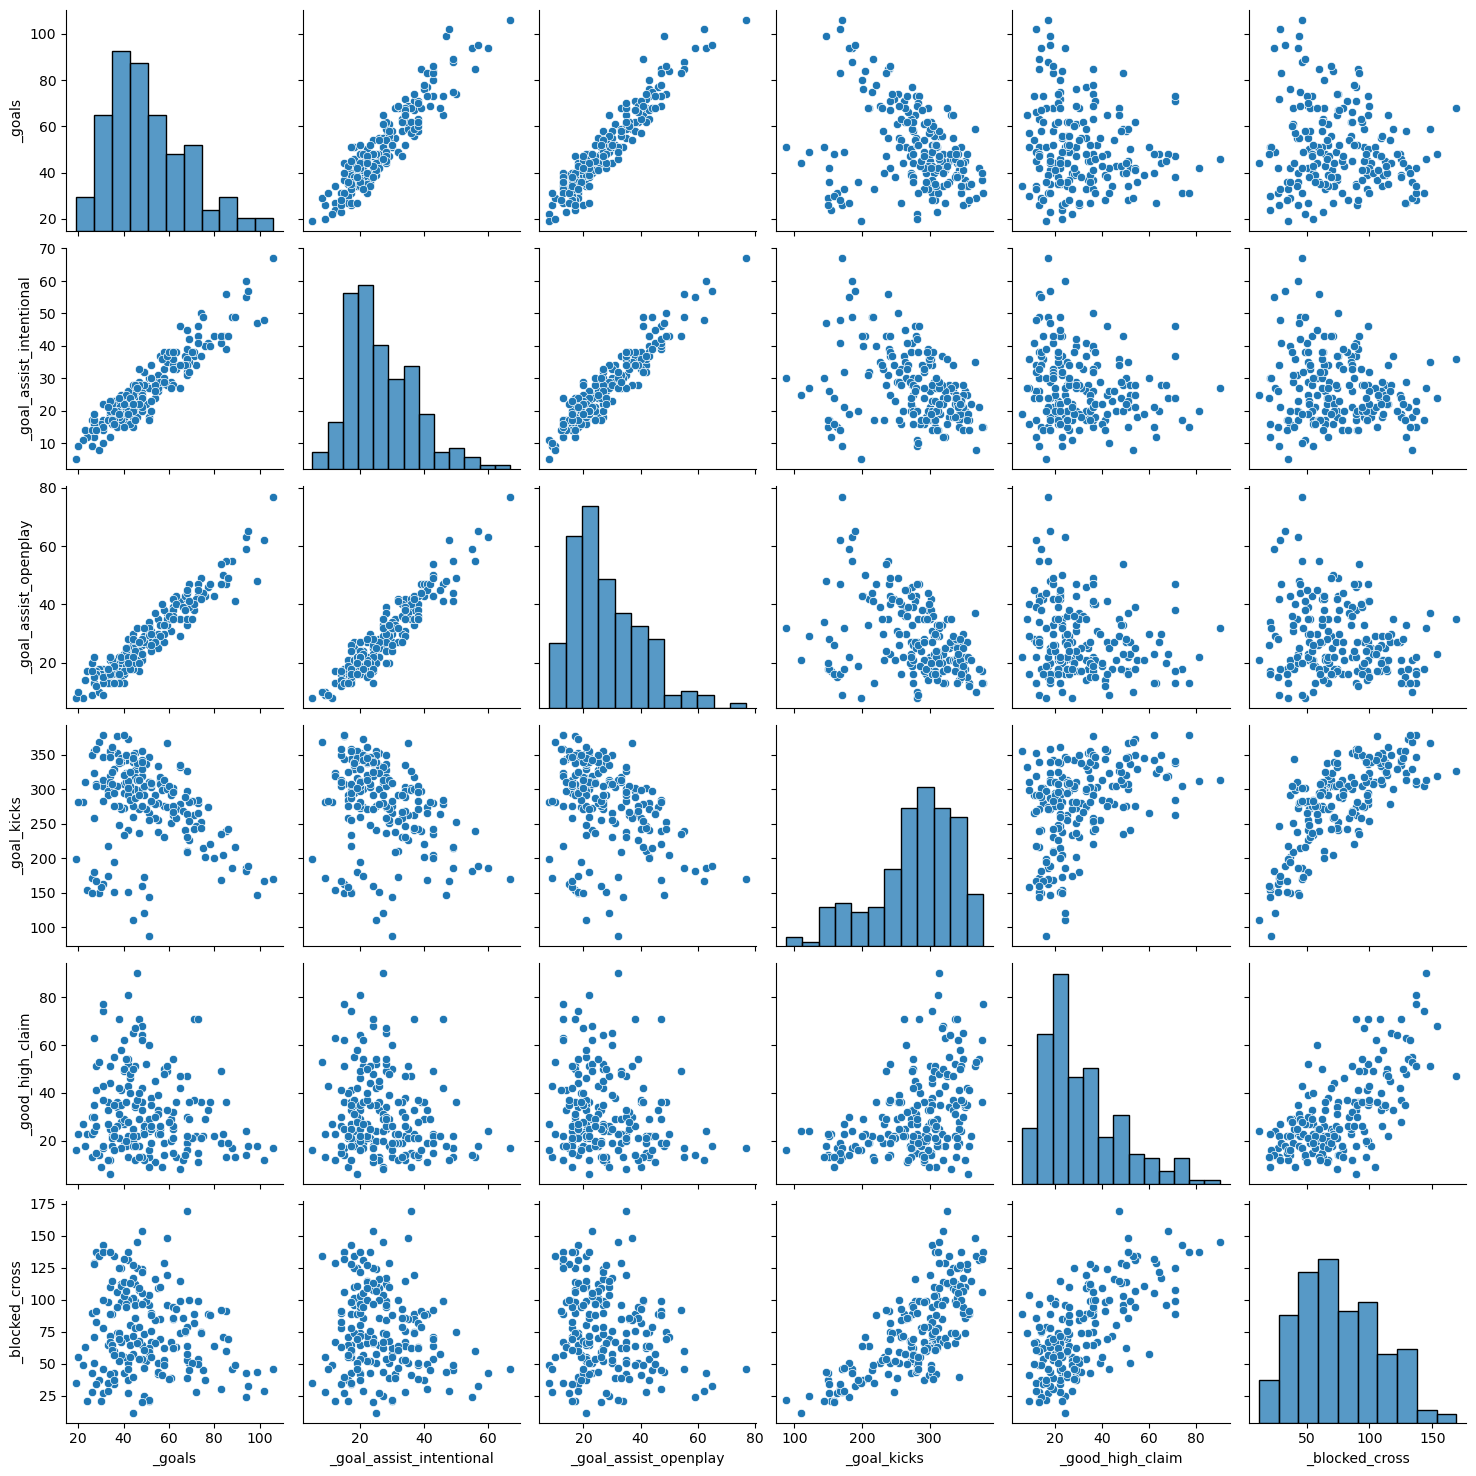

In [30]:
n = 5
target_id = 22  # _goals

for col in range(2, df_new.shape[1] - n, n):
    indices = [target_id] + list(range(col, col + n))
    
    if target_id in range(col, col + n):
        indices.remove(target_id)

    sns.pairplot(df_new.iloc[:, indices])

In [31]:
df.to_csv(Path('eda_data/clubs_stat.csv').resolve(), index=False)